In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [52]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target
data['variety'] = variety
data.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'variety']].head()


,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [5]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [6]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
lda = LinearDiscriminantAnalysis()

In [8]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0])

In [10]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [11]:
result

,0,1
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,2,2
6,2,2
7,0,0
8,1,1
9,1,1


In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, lda.predict(X_test))

0.9736842105263158

In [14]:
# коэффициенты дискриминатных линий
lda.coef_

array([[  6.17738362,  13.81770794, -17.30996095, -22.7259356 ],
       [ -1.29673032,  -5.10662241,   4.35477467,   3.13363313],
       [ -4.47196894,  -7.910063  ,  11.8469726 ,  18.00485272]])

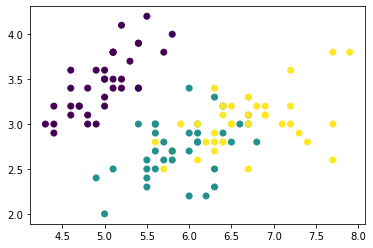

In [19]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [35]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

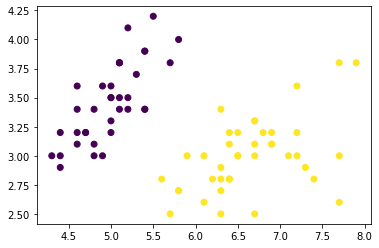

In [36]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [37]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [38]:
lda_small.means_

array([[4.98611111, 3.46111111],
       [6.64615385, 3.        ]])

<ipython-input-46-8510a7b6f8d8>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='YlOrBr',


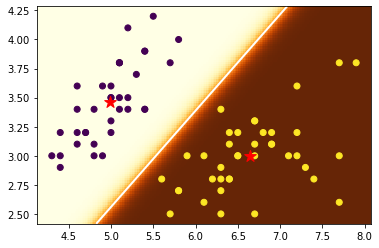

In [46]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='YlOrBr',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

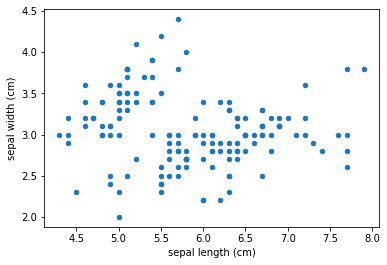

In [54]:
data.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')

In [55]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [76]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data)

In [83]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

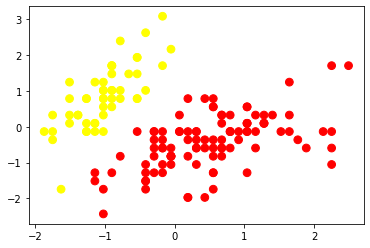

In [84]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [85]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

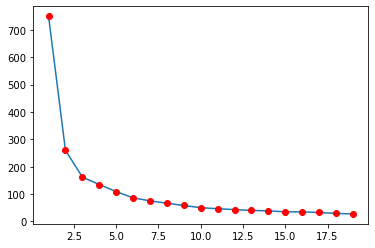

In [86]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [87]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

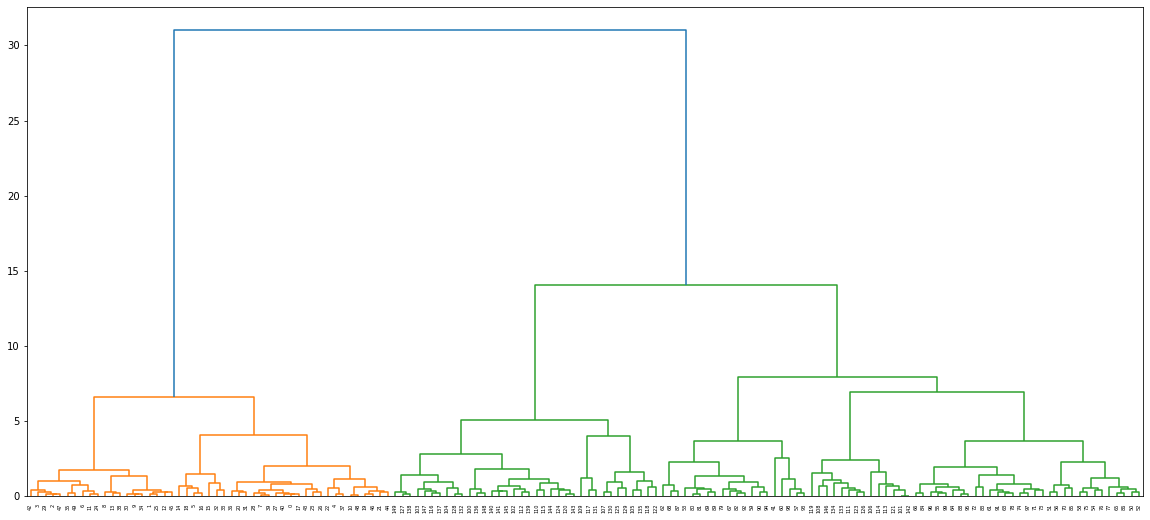

In [82]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)